In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Description

In this competition, you are provided a time-series forecasting problem centered around restaurant visitors. The data comes from two separate sites:

* Hot Pepper Gourmet (hpg): similar to Yelp, here users can search restaurants and also make a reservation online
* AirREGI / Restaurant Board (air): similar to Square, a reservation control and cash register system

You must use the reservations, visits, and other information from these sites to forecast future restaurant visitor totals on a given date. <span style="color:red">The training data covers the dates from 2016 until April 2017</span>. <span style="color:red">The test set covers the last week of April and May of 2017</span>. The test set is split based on time (the public fold coming first, the private fold following the public) and covers a chosen subset of the air restaurants. Note that the test set intentionally spans a holiday week in Japan called the "Golden Week."

There are days in the test set where the restaurant were closed and had no visitors. These are ignored in scoring. The training set omits days where the restaurants were closed.
### File Descriptions

This is a relational dataset from two systems. Each file is prefaced with the source (either air_ or hpg_) to indicate its origin. Each restaurant has a unique air_store_id and hpg_store_id. Note that not all restaurants are covered by both systems, and that you have been provided data beyond the restaurants for which you must forecast. Latitudes and Longitudes are not exact to discourage de-identification of restaurants.

### air_reserve.csv

This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

* `air_store_id` - the restaurant's id in the air system
* `visit_datetime` - the time of the reservation
* `reserve_datetime` - the time the reservation was made
* `reserve_visitors` - the number of visitors for that reservation

In [2]:
air_reserve = pd.read_csv('./data/air_reserve.csv', parse_dates=['visit_datetime','reserve_datetime']) 
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


### hpg_reserve.csv

This file contains reservations made in the hpg system.

* `hpg_store_id` - the restaurant's id in the hpg system
* `visit_datetime` - the time of the reservation
* `reserve_datetime` - the time the reservation was made
* `reserve_visitors` - the number of visitors for that reservation

In [3]:
hpg_reserve = pd.read_csv('./data/hpg_reserve.csv', parse_dates=['visit_datetime','reserve_datetime']) 
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


### air_store_info.csv

This file contains information about select air restaurants. Column names and contents are self-explanatory.

* `air_store_id`
* `air_genre_name`
* `air_area_name`
* `latitude`
* `longitude`
Note: latitude and longitude are the latitude and longitude of the area to which the store belongs

In [4]:
air_store_info = pd.read_csv('./data/air_store_info.csv') 
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


### hpg_store_info.csv

This file contains information about select hpg restaurants. Column names and contents are self-explanatory.

* `hpg_store_id`
* `hpg_genre_name`
* `hpg_area_name`
* `latitude`
* `longitude`
Note: latitude and longitude are the latitude and longitude of the area to which the store belongs

In [5]:
hpg_store_info = pd.read_csv('./data/hpg_store_info.csv') 
hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


### store_id_relation.csv

This file allows you to join select restaurants that have both the air and hpg system.

* `hpg_store_id`
* `air_store_id`

In [6]:
store_id_relation = pd.read_csv('./data/store_id_relation.csv') 
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


### air_visit_data.csv

This file contains historical visit data for the air restaurants.

* `air_store_id`
* `visit_date - the date`
* `visitors - the number of visitors to the restaurant on the date`

In [7]:
air_visit_data = pd.read_csv('./data/air_visit_data.csv', parse_dates=['visit_date']) 
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


### date_info.csv

This file gives basic information about the calendar dates in the dataset.

* `calendar_date`
* `day_of_week`
* `holiday_flg - is the day a holiday in Japan`

In [8]:
date_info = pd.read_csv('./data/date_info.csv', parse_dates=['calendar_date']) 
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


### sample_submission.csv

This file shows a submission in the correct format, including the days for which you must forecast.

* `id` - the id is formed by concatenating the air_store_id and visit_date with an underscore
* `visitors`- the number of visitors forecasted for the store and date combination

In [9]:
sample_submit = pd.read_csv('./data/sample_submission.csv') 
sample_submit.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


# data analysis

In [10]:
air_visit_data.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


We find that this file contains the visitors numbers for each visit_date and air_store_id. The date feature should be transformed into a time-series format. There are 829 different stores, which is a small data set:

In [11]:
len(air_visit_data.air_store_id.unique())

829

# Individual feature visualisations

### 1 air_visit_data

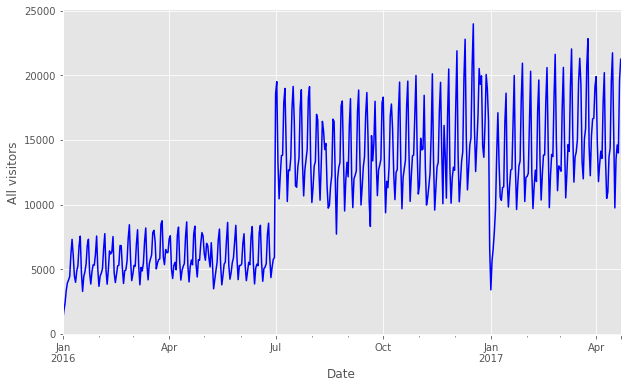

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
all_visitors = air_visit_data.groupby(['visit_date'])['visitors'].sum()
ax = all_visitors.plot(style='b')
ax.set_xlabel("Date");
ax.set_ylabel("All visitors");

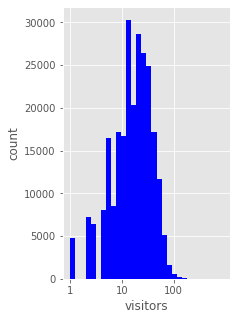

In [13]:
plt.figure(figsize=(3,5))
ax = np.log10(air_visit_data.visitors).hist(bins=30,color='b')
t = ax.get_xticks()[1:-1][::2]
plt.xticks(np.arange(min(t), max(t)+1, 1.0));
ax.set_xticklabels([int(10**i) for i in ax.get_xticks()  ]);
ax.set_xlabel("visitors");
ax.set_ylabel("count");

In [14]:
air_visit_data['dow'] = pd.to_datetime(air_visit_data['visit_date']).dt.dayofweek

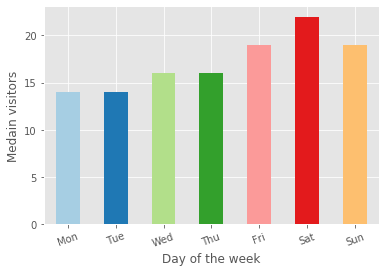

In [15]:
day_of_week_visitors = air_visit_data.groupby('dow').median()
ax = day_of_week_visitors['visitors'].T.plot(kind='bar', stacked=True, 
                               color=plt.cm.Paired(np.arange(7)),legend = False)
ax.set_xlabel("Day of the week");
ax.set_ylabel("Medain visitors");
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],rotation=20);

In [16]:
air_visit_data['dom'] = pd.to_datetime(air_visit_data['visit_date']).dt.month

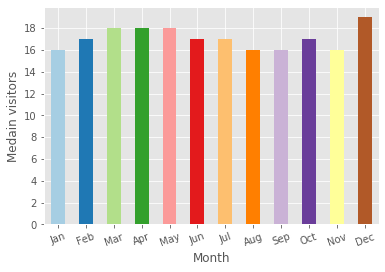

In [17]:
day_of_month_visitors = air_visit_data.groupby('dom').median()
ax = day_of_month_visitors['visitors'].T.plot(kind='bar', 
                                              color=plt.cm.Paired(np.arange(len(day_of_month_visitors))),stacked=True, legend = False)
ax.set_xlabel("Month");
ax.set_ylabel("Medain visitors");
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",
                   "Aug","Sep","Oct","Nov","Dec"],rotation=20);
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [18]:
total_visit = air_visit_data.groupby(['visit_date']).sum()
total_visit = total_visit.loc[pd.date_range("2016-04-15","2016-06-15")]['visitors']

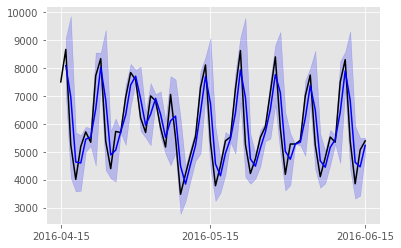

In [19]:
import matplotlib.dates as mdates

ma = total_visit.rolling(2).mean()
mstd = 0.6*total_visit.rolling(2).std()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(total_visit.index, total_visit, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd,  color='b', alpha=0.2)
ax.xaxis.set_major_locator(mdates.DayLocator(15))   #to get a tick on every 15th dat
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))     # formatting

### 2 Air Reservations

In [20]:
air_reserve['visit_day'] = air_reserve['visit_datetime'].dt.date

In [21]:
air_reserve['visit_hour'] = air_reserve['visit_datetime'].dt.hour

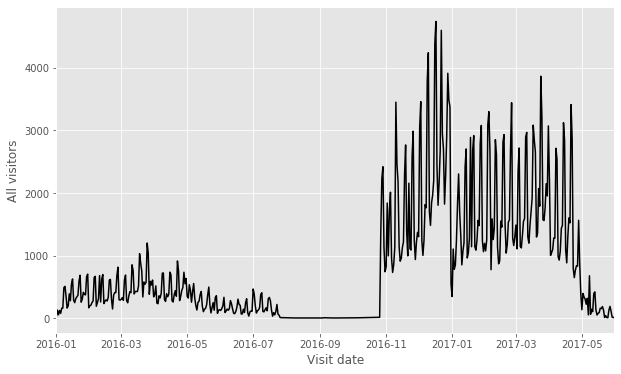

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
all_visitors = air_reserve.groupby(['visit_day'])['reserve_visitors'].sum()
ax = all_visitors.plot(style='k')
ax.set_xlabel("Visit date");
ax.set_ylabel("All visitors");

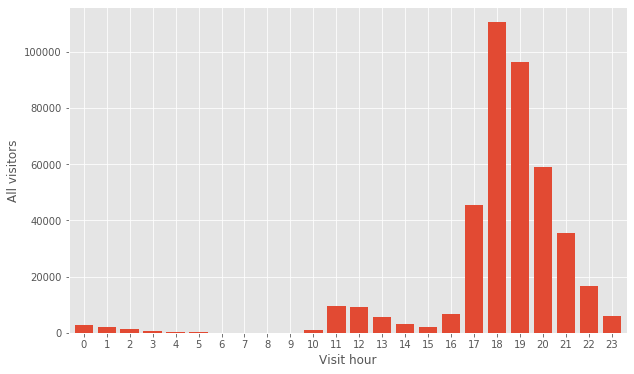

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
all_visitors = air_reserve.groupby(['visit_hour'])['reserve_visitors'].sum()
ax = all_visitors.plot(kind ='bar',width=0.8)
ax.set_xlabel("Visit hour");
ax.set_ylabel("All visitors");
ax.set_xticklabels(labels = range(0,25),rotation=0);

In [24]:
air_reserve['time_diff'] = air_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']), axis=1).dt.total_seconds() / 3600

In [25]:
air_reserve['time_diff'] = air_reserve['time_diff'].astype('int32')

In [26]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_day,visit_hour,time_diff
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,19,3
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,19,0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,19,0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01,20,4
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01,20,19


In [27]:
all_visitors = air_reserve.groupby(['time_diff'])['reserve_visitors'].sum()

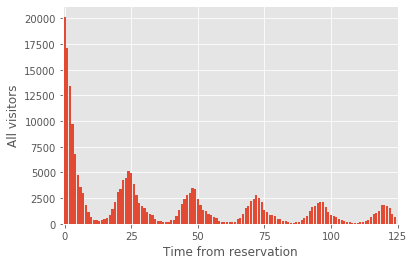

In [28]:
plt.style.use('ggplot')
all_visitors[:125].plot(kind ='bar',width=0.8)
ax.xaxis.set_major_locator(mdates.DayLocator(25))   #to get a tick on every 15th dat
plt.xticks([0,25,50,75,100,125],[0,25,50,75,100,125],rotation='horizontal');
plt.xlabel("Time from reservation");
plt.ylabel("All visitors");

### 3 HPG Reservations

In [29]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [30]:
hpg_reserve['visit_day'] = hpg_reserve['visit_datetime'].dt.date
hpg_reserve['visit_hour'] = hpg_reserve['visit_datetime'].dt.hour

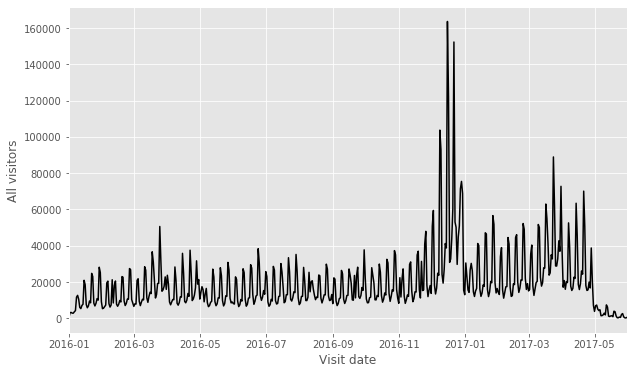

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
all_visitors = hpg_reserve.groupby(['visit_day'])['reserve_visitors'].sum()
ax = all_visitors.plot(style='k')
ax.set_xlabel("Visit date");
ax.set_ylabel("All visitors");

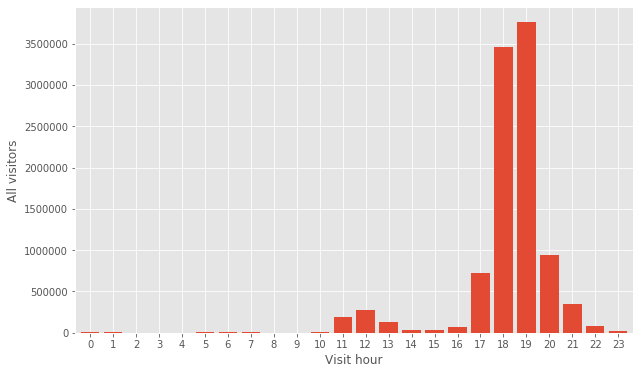

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
all_visitors = hpg_reserve.groupby(['visit_hour'])['reserve_visitors'].sum()
ax = all_visitors.plot(kind ='bar',width=0.8)
ax.set_xlabel("Visit hour");
ax.set_ylabel("All visitors");
ax.set_xticklabels(labels = range(0,25),rotation=0);

### 這邊200萬筆資料要特別久

In [33]:
hpg_reserve['time_diff'] = hpg_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']), 
                                             axis=1).dt.total_seconds() / 3600

In [34]:
hpg_reserve['time_diff'] = hpg_reserve['time_diff'].astype('int32')

In [35]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_day,visit_hour,time_diff
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,2016-01-01,11,2
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,2016-01-01,13,7
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,2016-01-01,16,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,2016-01-01,17,6
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,2016-01-01,17,14


In [36]:
all_visitors = hpg_reserve.groupby(['time_diff'])['reserve_visitors'].sum()

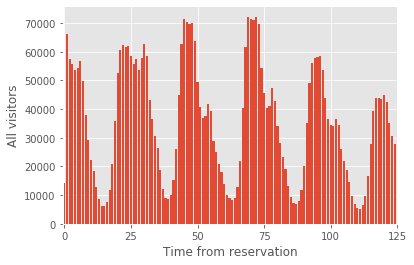

In [37]:
plt.style.use('ggplot')
all_visitors[:125].plot(kind ='bar',width=0.8)
ax.xaxis.set_major_locator(mdates.DayLocator(25))   #to get a tick on every 15th dat
plt.xticks([0,25,50,75,100,125],[0,25,50,75,100,125],rotation='horizontal');
plt.xlabel("Time from reservation");
plt.ylabel("All visitors");

### 4 Air Store

In [38]:
air_store_info.groupby(['air_genre_name']).count().sort_values(by=['air_store_id'],ascending=False)

,air_store_id,air_area_name,latitude,longitude
air_genre_name,,,,
Izakaya,197,197,197,197
Cafe/Sweets,181,181,181,181
Dining bar,108,108,108,108
Italian/French,102,102,102,102
Bar/Cocktail,79,79,79,79
Japanese food,63,63,63,63
Other,27,27,27,27
Yakiniku/Korean food,23,23,23,23
Western food,16,16,16,16


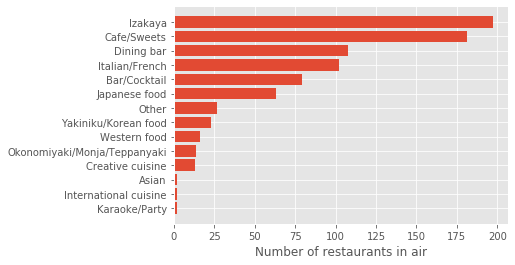

In [39]:
fig, ax = plt.subplots()

# Example data
genre = ('Izakaya','Cafe/Sweets', 'Dining bar','Italian/French','Bar/Cocktail','Japanese food','Other',
         'Yakiniku/Korean food','Western food','Okonomiyaki/Monja/Teppanyaki','Creative cuisine',
         'Asian','International cuisine','Karaoke/Party')
y_pos = np.arange(len(genre))

genre_count = air_store_info.groupby(['air_genre_name']).count().sort_values(by=['air_store_id'],ascending=False)['air_store_id']

ax.barh(y_pos, genre_count,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of restaurants in air');

In [40]:
air_store_info.groupby(['air_area_name']).count().sort_values(by=['air_store_id'],ascending=False).head(15)

,air_store_id,air_genre_name,latitude,longitude
air_area_name,,,,
Fukuoka-ken Fukuoka-shi Daimyō,64,64,64,64
Tōkyō-to Shibuya-ku Shibuya,58,58,58,58
Tōkyō-to Minato-ku Shibakōen,51,51,51,51
Tōkyō-to Shinjuku-ku Kabukichō,39,39,39,39
Tōkyō-to Setagaya-ku Setagaya,30,30,30,30
Tōkyō-to Chūō-ku Tsukiji,29,29,29,29
Ōsaka-fu Ōsaka-shi Ōgimachi,25,25,25,25
Hiroshima-ken Hiroshima-shi Kokutaijimachi,23,23,23,23
Tōkyō-to Meguro-ku Kamimeguro,22,22,22,22


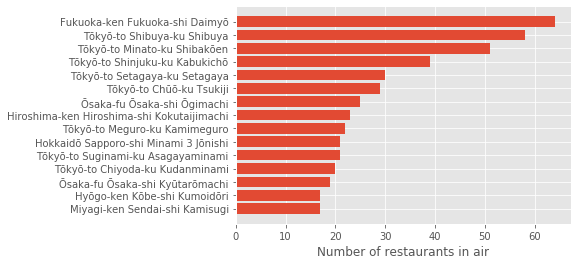

In [41]:
fig, ax = plt.subplots()

# Example data
area = ('Fukuoka-ken Fukuoka-shi Daimyō',
'Tōkyō-to Shibuya-ku Shibuya',
'Tōkyō-to Minato-ku Shibakōen',
'Tōkyō-to Shinjuku-ku Kabukichō',
'Tōkyō-to Setagaya-ku Setagaya',
'Tōkyō-to Chūō-ku Tsukiji',
'Ōsaka-fu Ōsaka-shi Ōgimachi',
'Hiroshima-ken Hiroshima-shi Kokutaijimachi',
'Tōkyō-to Meguro-ku Kamimeguro',
'Hokkaidō Sapporo-shi Minami 3 Jōnishi',
'Tōkyō-to Suginami-ku Asagayaminami',
'Tōkyō-to Chiyoda-ku Kudanminami',
'Ōsaka-fu Ōsaka-shi Kyūtarōmachi',
'Hyōgo-ken Kōbe-shi Kumoidōri',
'Miyagi-ken Sendai-shi Kamisugi')
y_pos = np.arange(len(area))

area_count = air_store_info.groupby(['air_area_name']).count().sort_values(by=['air_store_id'],ascending=False)[:15]['air_store_id']

ax.barh(y_pos, area_count,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(area)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of restaurants in air');

### 5 HPG Store

In [42]:
hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [43]:
hpg_store_info.groupby(['hpg_genre_name']).count().sort_values(by=['hpg_store_id'],ascending=False)

,hpg_store_id,hpg_area_name,latitude,longitude
hpg_genre_name,,,,
Japanese style,1750,1750,1750,1750
International cuisine,700,700,700,700
Creation,410,410,410,410
Seafood,339,339,339,339
Grilled meat,325,325,325,325
Italian,249,249,249,249
Spain Bar/Italian Bar,229,229,229,229
Chinese general,91,91,91,91
Japanese food in general,85,85,85,85


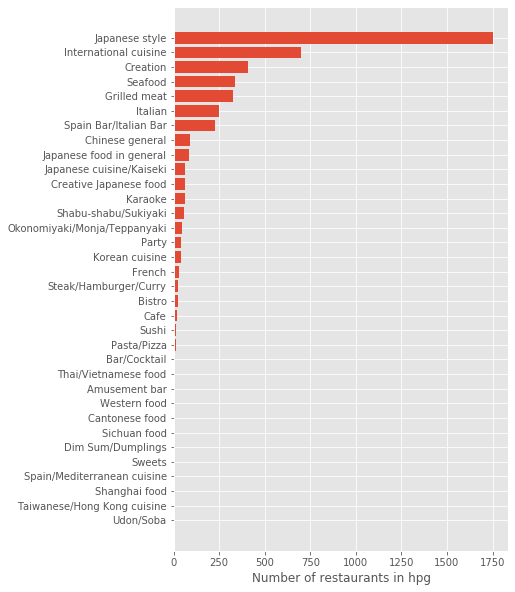

In [44]:
fig, ax = plt.subplots(figsize=(6,10))

# Example data
genre = ('Japanese style', 'International cuisine', 'Creation', 'Seafood',  'Grilled meat',                   
'Italian',  'Spain Bar/Italian Bar','Chinese general', 'Japanese food in general', 'Japanese cuisine/Kaiseki',          
'Creative Japanese food', 'Karaoke','Shabu-shabu/Sukiyaki', 'Okonomiyaki/Monja/Teppanyaki',      
'Party','Korean cuisine', 'French', 'Steak/Hamburger/Curry','Bistro', 'Cafe', 'Sushi',                             
'Pasta/Pizza', 'Bar/Cocktail', 'Thai/Vietnamese food', 'Amusement bar', 'Western food',                       
'Cantonese food',  'Sichuan food', 'Dim Sum/Dumplings','Sweets','Spain/Mediterranean cuisine', 
'Shanghai food','Taiwanese/Hong Kong cuisine', 'Udon/Soba')
y_pos = np.arange(len(genre))

genre_count = hpg_store_info.groupby(['hpg_genre_name']).count().sort_values(by=['hpg_store_id'],
                                                                             ascending=False)['hpg_store_id']

ax.barh(y_pos, genre_count,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of restaurants in hpg');

### 6 Holidays

In [45]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [46]:
date_info.groupby(['holiday_flg']).count()

,calendar_date,day_of_week
holiday_flg,,
0,482,482
1,35,35


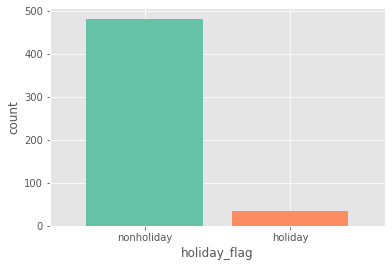

In [47]:
plt.style.use('ggplot')
holiday_flag = date_info.groupby(['holiday_flg']).count()['calendar_date']
ax = holiday_flag.plot(kind ='bar',width=0.8,color=plt.cm.Set2(np.arange(len(holiday_flag))))
ax.set_xlabel("holiday_flag");
ax.set_ylabel("count");
ax.set_xticklabels(labels = ['nonholiday','holiday'],rotation=0);

In [48]:
predict_time_flag = date_info.groupby(['calendar_date']).sum().loc[pd.date_range("2016-04-15","2016-06-15")]
predict_time_flag

,holiday_flg
2016-04-15,0
2016-04-16,0
2016-04-17,0
2016-04-18,0
2016-04-19,0
...,...
2016-06-11,0
2016-06-12,0
2016-06-13,0
2016-06-14,0


In [49]:
predict_time_flag['date_num'] = pd.DataFrame(np.arange(62),index=pd.date_range("2016-04-15","2016-06-15"))

In [50]:
predict_time_flag.head()

,holiday_flg,date_num
2016-04-15,0,0
2016-04-16,0,1
2016-04-17,0,2
2016-04-18,0,3
2016-04-19,0,4


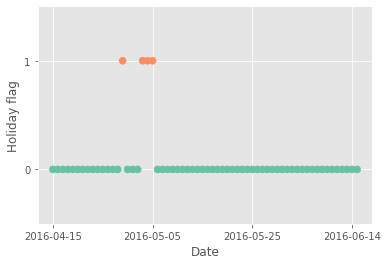

In [51]:
predict_time_flag.plot(x = 'date_num', y='holiday_flg',kind = 'scatter',color
                         = plt.cm.Set2(predict_time_flag['holiday_flg']),s=50)
plt.xticks([0,20,40,60],['2016-04-15','2016-05-05','2016-05-25',"2016-06-14"],rotation='horizontal');
plt.yticks([0,1])
plt.ylim([-0.5,1.5])
plt.xlabel("Date");
plt.ylabel("Holiday flag");

# Feature relations

## 1 Visitors per genre

In [52]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [53]:
air_visit_data.head()

,air_store_id,visit_date,visitors,dow,dom
0,air_ba937bf13d40fb24,2016-01-13,25,2,1
1,air_ba937bf13d40fb24,2016-01-14,32,3,1
2,air_ba937bf13d40fb24,2016-01-15,29,4,1
3,air_ba937bf13d40fb24,2016-01-16,22,5,1
4,air_ba937bf13d40fb24,2016-01-18,6,0,1


In [54]:
air_visitNstore = pd.merge(air_visit_data, air_store_info, how='left', on=['air_store_id'])
air_visitNstore.head()

,air_store_id,visit_date,visitors,dow,dom,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,2,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,3,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,4,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,5,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [55]:
genre_date = air_visitNstore.groupby(['air_genre_name','visit_date']).mean()
genre_date

visitors  dow  dom   latitude   longitude
air_genre_name       visit_date                                            
Asian                2016-05-01  65.000000  6.0  5.0  35.661777  139.704051
                     2016-05-07  49.000000  5.0  5.0  35.661777  139.704051
                     2016-05-08  51.000000  6.0  5.0  35.661777  139.704051
                     2016-05-09  21.000000  0.0  5.0  35.661777  139.704051
                     2016-05-10  36.000000  1.0  5.0  35.661777  139.704051
...                                    ...  ...  ...        ...         ...
Yakiniku/Korean food 2017-04-18  17.450000  1.0  4.0  37.869775  138.525899
                     2017-04-19  24.150000  2.0  4.0  37.395770  137.994090
                     2017-04-20  18.818182  3.0  4.0  38.004427  138.650054
                     2017-04-21  29.608696  4.0  4.0  37.812461  138.291043
                     2017-04-22  28.863636  5.0  4.0  37.953693  138.417453

[6176 rows x 5 columns]

In [56]:
idx = genre_date.index.get_level_values('air_genre_name').unique()
idx

Index(['Asian', 'Bar/Cocktail', 'Cafe/Sweets', 'Creative cuisine',
       'Dining bar', 'International cuisine', 'Italian/French', 'Izakaya',
       'Japanese food', 'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki',
       'Other', 'Western food', 'Yakiniku/Korean food'],
      dtype='object', name='air_genre_name')

In [57]:
len(idx)

14

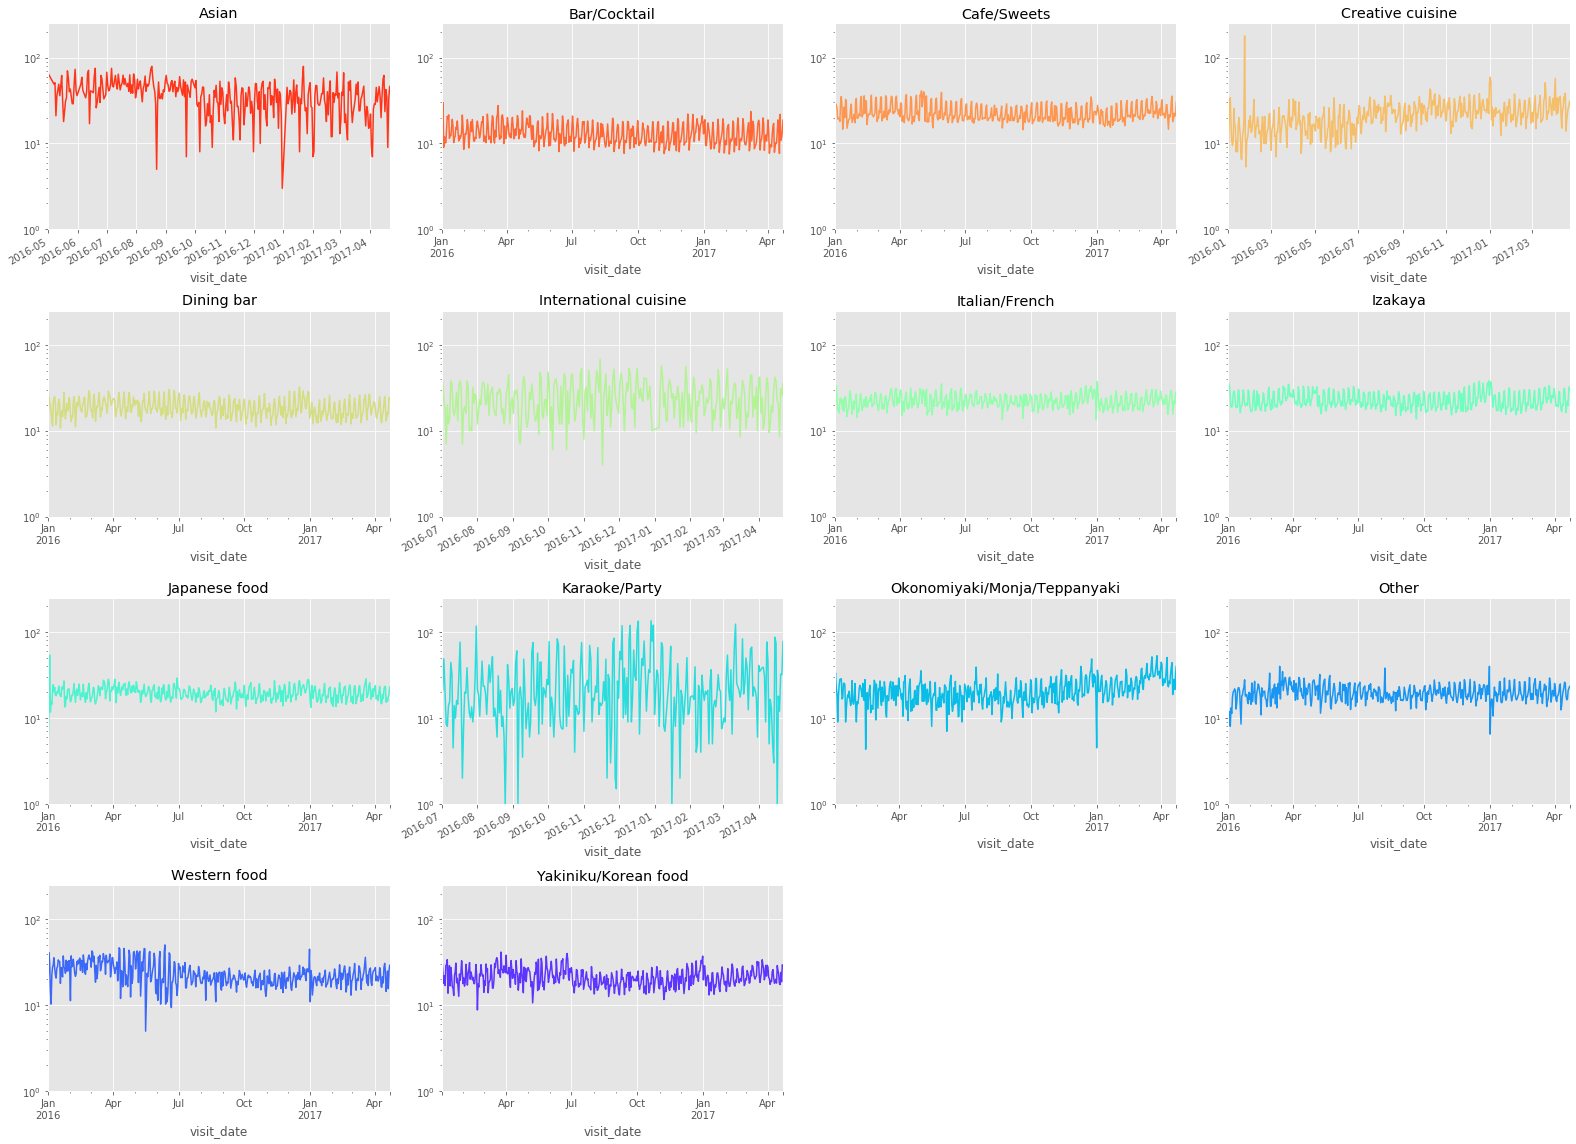

In [58]:
plt.figure(figsize=(22,16))
for i in range(1,15):
    plt.subplot(4,4,i)
    genre_date.loc[idx[i-1]]['visitors'].plot(color = plt.cm.rainbow(1-i/15))
    plt.ylim(1,250)
    plt.yscale('log')
    plt.title(idx[i-1])
    plt.tight_layout()

In [59]:
air_visitNstore.head()

,air_store_id,visit_date,visitors,dow,dom,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,2,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,3,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,4,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,5,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [60]:
from sklearn import *

In [61]:
le = preprocessing.LabelEncoder()
air_visitNstore['genre_num'] = le.fit_transform(air_visitNstore['air_genre_name'])

In [62]:
air_visitNstore.head()

,air_store_id,visit_date,visitors,dow,dom,air_genre_name,air_area_name,latitude,longitude,genre_num
0,air_ba937bf13d40fb24,2016-01-13,25,2,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,4
1,air_ba937bf13d40fb24,2016-01-14,32,3,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,4
2,air_ba937bf13d40fb24,2016-01-15,29,4,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,4
3,air_ba937bf13d40fb24,2016-01-16,22,5,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,4
4,air_ba937bf13d40fb24,2016-01-18,6,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,4


In [63]:
genre_visit = air_visitNstore.groupby(['dow','air_genre_name']).mean()
genre_visit

visitors       dom   latitude   longitude  \
dow air_genre_name                                                             
0   Asian                         33.964286  6.821429  35.661777  139.704051   
    Bar/Cocktail                   9.840491  6.157895  36.044903  138.384350   
    Cafe/Sweets                   19.706484  6.264989  35.122525  136.356854   
    Creative cuisine              19.010638  6.333333  34.940715  136.216636   
    Dining bar                    14.543439  6.241884  35.644223  137.691986   
...                                     ...       ...        ...         ...   
6   Karaoke/Party                 56.621951  6.719512  43.055460  141.340956   
    Okonomiyaki/Monja/Teppanyaki  28.675516  5.864307  34.691982  134.758596   
    Other                         23.688669  6.180418  35.118802  137.521824   
    Western food                  25.347676  6.146299  36.299519  139.828069   
    Yakiniku/Korean food          21.434568  6.209877  38.583593  138.989077   

                                  genre_num  
dow air_genre_name                           
0   Asian                               0.0  
    Bar/Cocktail                        1.0  
    Cafe/Sweets                         2.0  
    Creative cuisine                    3.0  
    Dining bar                          4.0  
...                                     ...  
6   Karaoke/Party                       9.0  
    Okonomiyaki/Monja/Teppanyaki       10.0  
    Other                              11.0  
    Western food                       12.0  
    Yakiniku/Korean food               13.0  

[98 rows x 5 columns]

In [64]:
genre_visit.reset_index(inplace=True)
genre_visit.head()

,dow,air_genre_name,visitors,dom,latitude,longitude,genre_num
0,0,Asian,33.964286,6.821429,35.661777,139.704051,0.0
1,0,Bar/Cocktail,9.840491,6.157895,36.044903,138.384350,1.0
2,0,Cafe/Sweets,19.706484,6.264989,35.122525,136.356854,2.0
3,0,Creative cuisine,19.010638,6.333333,34.940715,136.216636,3.0
4,0,Dining bar,14.543439,6.241884,35.644223,137.691986,4.0


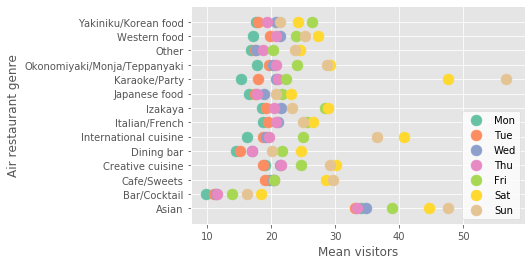

In [65]:
for i in range(7):
    plt.scatter(x = genre_visit[genre_visit['dow'] == i ]['visitors'],
                y = genre_visit[genre_visit['dow'] == i ]['genre_num'],
                color= plt.cm.Set2(i),s=120)
plt.xlabel("Mean visitors");
plt.ylabel("Air restaurant genre");
plt.yticks(np.arange(14), idx);
plt.legend(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],facecolor='white');

### The impact of holidays

In [66]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [67]:
air_visit_data.head()

,air_store_id,visit_date,visitors,dow,dom
0,air_ba937bf13d40fb24,2016-01-13,25,2,1
1,air_ba937bf13d40fb24,2016-01-14,32,3,1
2,air_ba937bf13d40fb24,2016-01-15,29,4,1
3,air_ba937bf13d40fb24,2016-01-16,22,5,1
4,air_ba937bf13d40fb24,2016-01-18,6,0,1


In [68]:
air_visitNholi = pd.merge(air_visit_data, date_info.rename(columns={'calendar_date':'visit_date'})
                          , how='left', on=['visit_date'])
air_visitNholi.head()

,air_store_id,visit_date,visitors,dow,dom,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,2,1,Wednesday,0
1,air_ba937bf13d40fb24,2016-01-14,32,3,1,Thursday,0
2,air_ba937bf13d40fb24,2016-01-15,29,4,1,Friday,0
3,air_ba937bf13d40fb24,2016-01-16,22,5,1,Saturday,0
4,air_ba937bf13d40fb24,2016-01-18,6,0,1,Monday,0


In [69]:
air_visitNholi.groupby('holiday_flg').get_group(0)

,air_store_id,visit_date,visitors,dow,dom,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,2,1,Wednesday,0
1,air_ba937bf13d40fb24,2016-01-14,32,3,1,Thursday,0
2,air_ba937bf13d40fb24,2016-01-15,29,4,1,Friday,0
3,air_ba937bf13d40fb24,2016-01-16,22,5,1,Saturday,0
4,air_ba937bf13d40fb24,2016-01-18,6,0,1,Monday,0
...,...,...,...,...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6,1,4,Tuesday,0
252104,air_24e8414b9b07decb,2017-04-19,6,2,4,Wednesday,0
252105,air_24e8414b9b07decb,2017-04-20,7,3,4,Thursday,0
252106,air_24e8414b9b07decb,2017-04-21,8,4,4,Friday,0


In [70]:
air_visitNholi.groupby('holiday_flg').get_group(1)

,air_store_id,visit_date,visitors,dow,dom,day_of_week,holiday_flg
23,air_ba937bf13d40fb24,2016-02-11,3,3,2,Thursday,1
174,air_ba937bf13d40fb24,2016-08-11,2,3,8,Thursday,1
176,air_ba937bf13d40fb24,2016-08-13,21,5,8,Saturday,1
205,air_ba937bf13d40fb24,2016-09-22,21,3,9,Thursday,1
241,air_ba937bf13d40fb24,2016-11-03,12,3,11,Thursday,1
...,...,...,...,...,...,...,...
251985,air_24e8414b9b07decb,2016-11-23,8,2,11,Wednesday,1
252010,air_24e8414b9b07decb,2016-12-23,8,4,12,Friday,1
252016,air_24e8414b9b07decb,2016-12-29,2,3,12,Thursday,1
252017,air_24e8414b9b07decb,2016-12-30,7,4,12,Friday,1


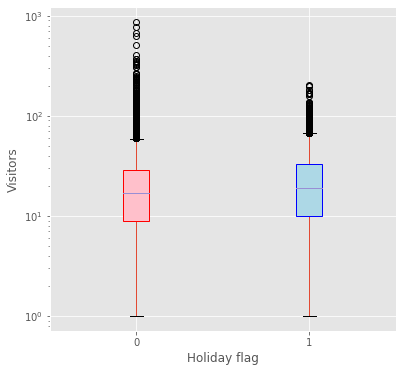

In [71]:
labels = ['False','True']
bp_dict = air_visitNholi.boxplot(column='visitors',by='holiday_flg',vert=True,  # vertical box alignment
                               return_type='both',figsize=(6,6),
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks);

colors = ['pink', 'lightblue']
colors2 = ['red','blue']
for row_key, (ax,row) in bp_dict.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set(color=colors2[i], linewidth=1)
        box.set_facecolor(colors[i])

ax.set_xlabel('Holiday flag')
ax.set_ylabel('Visitors')
ax.set_yscale('log')
plt.suptitle("")
ax.set_title('');

In [72]:
air_visitNholi.head()

,air_store_id,visit_date,visitors,dow,dom,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,2,1,Wednesday,0
1,air_ba937bf13d40fb24,2016-01-14,32,3,1,Thursday,0
2,air_ba937bf13d40fb24,2016-01-15,29,4,1,Friday,0
3,air_ba937bf13d40fb24,2016-01-16,22,5,1,Saturday,0
4,air_ba937bf13d40fb24,2016-01-18,6,0,1,Monday,0


In [73]:
air_visitNholi.groupby(['holiday_flg','day_of_week']).mean()

visitors  dow        dom
holiday_flg day_of_week                           
0           Friday       22.889265  4.0   6.035302
            Monday       16.541359  0.0   6.295749
            Saturday     26.406175  5.0   6.207940
            Sunday       23.839388  6.0   6.225098
            Thursday     18.540014  3.0   5.967390
            Tuesday      17.542357  1.0   6.252704
            Wednesday    19.141512  2.0   6.143629
1           Friday       27.436732  4.0  10.299754
            Monday       21.869048  0.0   5.549206
            Saturday     24.338269  5.0   5.955011
            Sunday       24.882293  6.0   5.143296
            Thursday     23.054331  3.0   8.970817
            Tuesday      26.761341  1.0   2.980276
            Wednesday    22.741722  2.0   9.450331

In [74]:
holiday_visit = air_visitNholi.groupby(['holiday_flg','day_of_week']).mean().reset_index()
holiday_visit

,holiday_flg,day_of_week,visitors,dow,dom
0,0,Friday,22.889265,4.0,6.035302
1,0,Monday,16.541359,0.0,6.295749
2,0,Saturday,26.406175,5.0,6.207940
3,0,Sunday,23.839388,6.0,6.225098
4,0,Thursday,18.540014,3.0,5.967390
5,0,Tuesday,17.542357,1.0,6.252704
6,0,Wednesday,19.141512,2.0,6.143629
7,1,Friday,27.436732,4.0,10.299754
8,1,Monday,21.869048,0.0,5.549206
9,1,Saturday,24.338269,5.0,5.955011


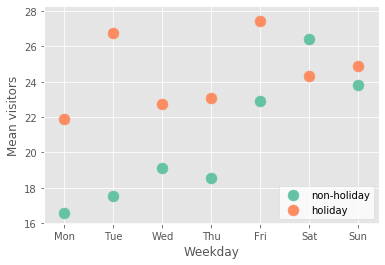

In [75]:
plt.figure(figsize=(6,4))
for i in range(2):
    plt.scatter(x = holiday_visit[holiday_visit['holiday_flg'] == i ]['dow'],
                y = holiday_visit[holiday_visit['holiday_flg'] == i ]['visitors'],
                color= plt.cm.Set2(i),s=120)
plt.xlabel("Weekday");
plt.ylabel("Mean visitors");
plt.xticks(np.arange(7), ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]);
plt.legend(['non-holiday','holiday'],facecolor='white');